<a href="https://colab.research.google.com/github/R0N3ldrt/Thesis/blob/main/spectrum-1_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading Enviroment

## Loading Drive and folders

In [1]:
# BLOQUE PARA USAR DESDE COLAB

# Google drive loading as work station for local-usage of the files.
from google.colab import drive
drive.mount('/content/gdrive',force_remount= True)

#-----------------------------------------------------------------------------

Mounted at /content/gdrive


In [2]:
# Lista para cambiar los paths rapido.
workers = ["Ronald", "Local"]

# Cambiar el numero aqui para cambiar los paths.
worker = workers[0]

if worker == "Ronald":
  path= "/content/gdrive/MyDrive/Thesis_Workstation/ANN_dataset"
else: path = os.getcwd()

## Loading Necesary Libraries

In [3]:
# Importing necesary libraries
import os, time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import pickle
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score
import seaborn as sn
from sklearn.metrics import f1_score

import warnings
warnings.filterwarnings("ignore")

# Loading Data and Pre-Procesing

In [4]:
data_path=path+"/Spectrum"

qpsk_path="/QPSK/A.10hops100km/"
qam_path="/16QAM/A.10hops100km"

#file_name="/dataSet_Spectrum_Samples_QPSK_37GHz_LongHaul_output_10x100.xlsx"
file_name="/QPSK_dummy.xlsx"
# Skipping first row since only contain "Frequency" headers
df_qpsk=pd.read_excel(data_path+qpsk_path+file_name, sheet_name = "Sheet1", skiprows=1)

#file_name="/dataSet_Spectrum_Samples_16QAM_75GHz_LongHaul_output_10x100.xlsx"
file_name="/16QAM_dummy.xlsx"
df_qam=pd.read_excel(data_path+qam_path+file_name, sheet_name = "Sheet1", skiprows=1)

#Diff in column 5 to 1,286 0.03125

In [5]:
#dump_file = dict desireed to be saved
#filename = just the name of the file (file saved on "pickle_folder")

def pickle_out(dump_file, filename):
  filepath = path+"/pickle_folder/"+str(filename)+".pickle"
  pickleout = open(filepath, "wb")
  pickle.dump(dump_file, pickleout)
  pickleout.close()

def pickle_in(filename):
  filepath = path+"/pickle_folder/"+str(filename)+".pickle"
  picklein = open(filepath, "rb")
  loaded_dict = pickle.load(picklein)
  return loaded_dict

## Aggregator

In [6]:
def prime_number_finder(stop_gap, total_num_of_data):
  prime_nums = []
  i=2
  while i <= stop_gap:
    if (total_num_of_data % i==0):
      prime_nums.append(i)
    i+=1
  return prime_nums

def aggreagator_selection(stop_gap=25, total_num_of_data=1281, min_prime = False):
  current_freq_offset = 0.03125
  
  # Find the prime numbers where the total_num_of_data is divisible
  prime_nums = prime_number_finder(stop_gap, total_num_of_data)
  
  # Find the offsets of the new aggregators
  new_freq_offsets = []
  for nums in prime_nums:
    freq_offset = current_freq_offset*(nums-1)
    new_freq_offsets.append(freq_offset)

  if min_prime == False:
    # Ask the user for the desired aggregator
    print('Please select one of the following prime number to conduct the aggregation {} with frequencies offsets of {}(PHz) respectively. (Current Freq offset is 0.03125 PHz)'.format(prime_nums, new_freq_offsets))
    while True:
      user_selection = input('Prime number to conduct the aggregation? ')
      if int(user_selection) not in prime_nums:
        print('Please select one of the available prime numbers. (Current selection is not avaliable)')
      else:
        break
    return int(user_selection)
  else:
    user_selection = min(prime_nums)
    freq_selected = min(new_freq_offsets)
    print('Selected the least common denominator for aggregation ({}) with a frequency of {}.'.format(user_selection, freq_selected))
    return int(user_selection)

def aggreagator(df, stop_gap=25, total_num_of_data=1281, min_prime = True):
  agg_num = aggreagator_selection(stop_gap, total_num_of_data, min_prime = False)
  
  # Creating new df of aggregate values
  agg_df = pd.DataFrame()
  agg_df = df[df.columns[0:5]]

  agg=0
  loop_cnt=0
  init_column_cnt = 5
  while agg<=total_num_of_data:
    loop_cnt+=1
    # Obtain current last columns stop
    agg=agg_num+init_column_cnt
    # Select working columns
    new_df = df[df.columns[init_column_cnt:agg]]

    init_column_cnt += (agg_num)
    #print(init_column_cnt)
    # Get average of freq values for new header
    headers = list(new_df.columns.values)
    headers_array = np.asarray(headers)
    new_header_name = np.mean(headers_array)

    # Add aggragated values to new df
    agg_df[str(new_header_name)] = new_df.mean(axis = 1)
  agg_dict = agg_df.to_dict()
  return agg_df, agg_dict


In [7]:
# QPSK AGG
#stop = 7
#QPSK_agg_df, QPSK_agg_dict = aggreagator(df_qpsk, stop_gap=100, total_num_of_data=1281, min_prime = False)
#pickle_out(QPSK_agg_dict, "test_agg_spectrum_QPSK_"+str(stop))

In [8]:
# QPSK QAM
#stop = 7
#QAM_agg_df, QAM_agg_dict = aggreagator(df_qam, stop_gap=100, total_num_of_data=1281, min_prime = False)
#pickle_out(QAM_agg_dict, "agg_spectrum_QAM_"+str(stop))

In [9]:
#pickle_dummy_dict = pickle_in("agg_spectrum_QPSK_7")

#print(pickle_dummy_dict.keys())
#ickle_dummy_dict['-19.90625'].values()

##Dummy Model

In [10]:
def get_dummy_spectrum(df):
  new_df = df.groupby(['#node']).mean()
  new_df.drop(['sampleid', 'Channels', 'power_dBm'], axis = 1, inplace = True)
  dummy_dict = new_df.to_dict()
  
  return new_df, dummy_dict

In [11]:
#new_df = 
#node	| Distance_km	|-20	      |-19.96875	|-19.9375																						
#1	    | 0.0	        |-52.955056	|-54.126681	|-52.713840	
#2	    | 100.0	      |-51.813386	|-53.194155	|-52.697528
#3	    | 200.0	      |-55.626777	|-54.634329	|-54.702958

#dummy_dict.keys() = dict_keys(['Distance_km', -20, -19.96875, -19.9375, -19.90625, -19.875, -19.84375...
#dummy_dict[-20].values() = dict_values([-52.955056039, -51.813386274, -55.626777088])

In [26]:
# Dummy Model QPSK
QPSK_dummy_df, QPSK_dummy_dict = get_dummy_spectrum(df_qpsk)
#pickle_out(QPSK_dummy_dict, "dummy_AGG_spectrum_QPSK")

In [27]:
# Dummy Model QAM
QAM_dummy_df, QAM_dummy_dict = get_dummy_spectrum(df_qam)
#pickle_out(QAM_dummy_dict, "dummy_AGG_spectrum_QAM")

In [14]:
#pickle_dummy_dict = pickle_in("dummy_AGG_spectrum_QPSK")
#pickle_dummy_dict['Distance_km'].values()

# Processing

## Focus Selector

In [15]:
# Aggregated model
pickle_agg_QPSK_dict = pickle_in("test_agg_spectrum_QPSK_7")
pickle_agg_AQM_dict = pickle_in("test_agg_spectrum_QAM_7")

# Dummy models
pickle_dummy_QPSK_dict = pickle_in("test_dummy_AGG_spectrum_QPSK")
pickle_dummy_QAM_dict = pickle_in("test_dummy_AGG_spectrum_QAM")

In [16]:
#new_df = 
#node	  | Distance_km	|-20	      |-19.96875	|-19.9375																						
#1	    | 0.0	        |-52.955056	|-54.126681	|-52.713840	
#2	    | 100.0	      |-51.813386	|-53.194155	|-52.697528
#3	    | 200.0	      |-55.626777	|-54.634329	|-54.702958

#dummy_dict.keys() = dict_keys(['Distance_km', -20, -19.96875, -19.9375, -19.90625, -19.875, -19.84375...
#dummy_dict[-20].values() = dict_values([-52.955056039, -51.813386274, -55.626777088])

In [17]:
print(pickle_agg_QPSK_dict.keys())
pickle_dummy_QAM_dict['-39.90625'].values()

dict_keys(['sampleid', 'Channels', 'Distance_km', 'power_dBm', '#node', '-19.96875', '-19.875', '-19.78125', '-19.6875', '-19.59375', '-19.5', '-19.40625', '-19.3125', '-19.21875', '-19.125', '-19.03125', '-18.9375', '-18.84375', '-18.75', '-18.65625', '-18.5625', '-18.46875', '-18.375', '-18.28125', '-18.1875', '-18.09375', '-18.0', '-17.90625', '-17.8125', '-17.71875', '-17.625', '-17.53125', '-17.4375', '-17.34375', '-17.25', '-17.15625', '-17.0625', '-16.96875', '-16.875', '-16.78125', '-16.6875', '-16.59375', '-16.5', '-16.40625', '-16.3125', '-16.21875', '-16.125', '-16.03125', '-15.9375', '-15.84375', '-15.75', '-15.65625', '-15.5625', '-15.46875', '-15.375', '-15.28125', '-15.1875', '-15.09375', '-15.0', '-14.90625', '-14.8125', '-14.71875', '-14.625', '-14.53125', '-14.4375', '-14.34375', '-14.25', '-14.15625', '-14.0625', '-13.96875', '-13.875', '-13.78125', '-13.6875', '-13.59375', '-13.5', '-13.40625', '-13.3125', '-13.21875', '-13.125', '-13.03125', '-12.9375', '-12.84375'

dict_values([-51.967543919, -50.006399713])

In [18]:
def freq_selector(pickle_dict):
  invalid = {'Distance_km','sampleid', 'Channels', 'power_dBm', '#node'}
  freqs = []
  for i in pickle_dict:
    if i not in invalid:
      freqs.append(i)
  return np.array(freqs)
#freq_selector(pickle_agg_QPSK_dict)

In [19]:
def focus_selector_calc(eval_df, min_prime = False):
  
  sensitivity_df = pd.DataFrame()

  # Find min common multipler (smallesr we can break the slots)
  non_escencial_data_col = 5
  
  number_of_data = eval_df.shape[1]-(non_escencial_data_col-1)-1
  
  # Selecting the prime factors where we can reduce the data
  #min_prime_num = min(prime_number_finder(stop_gap=100, total_num_of_data=number_of_data))
  user_prime_selection = aggreagator_selection(stop_gap=100, total_num_of_data=number_of_data, min_prime = min_prime)  

  cnt = 1
  current = non_escencial_data_col
  while current <= number_of_data:
    end_range = current+(user_prime_selection)
    new_df = eval_df[eval_df.columns[current:end_range]]

    
    # Add aggragated values to new df
    sensitivity_df[eval_df.columns[current]] = new_df.mean(axis = 1)
    current+=user_prime_selection
    cnt+=1
  return sensitivity_df, user_prime_selection

# Select only the columns where we observe and increase of 500%
# Return a dictionary with the row as keys and and array with positional location of columns to be selected as values
def focus_selector_range(df, threshhold=5):
  old_column = 0
  selected_data_ranges = {}
  shape = df.shape
  rows = shape[0]
  columns = shape[1]
  for row in range(rows):
    delta = 0
    col_selected_array = []  
    for col in range(columns):
      if col == 0:
        pass
      else:   
        delta = abs((df.iat[row, col])-(df.iat[row, (col-1)]))   
        if delta>=threshhold:
          col_selected_array.append(col) 
    selected_data_ranges[row] = col_selected_array
   
  return selected_data_ranges

# Return dictionary with rows and columns to be selected from sensitivity_df
def focus_selector_removing_outlayers(df, focus_dict, node):
  threshold_pass = True
  new_dict = {}
  unique_columns = set({})
  info_per_node = 10
  nodes_dict_of_selected_columns = {}

  # k = row
  # v_array = array of columns selected
  for k, v_array in focus_dict.items():
    new_array = []
    old_v = 0

    # Check if selected columns are at least 7 or more to make sure threshold is not losing data
    if len(v_array) <= 7:
      #print('Threshold on function "focus_selector_range" is to big please select and smaller threshold.') 
      threshold_pass = False
      break
    # Adding one more selection earlier for being more flexible
    elif old_v == 0:
      min_array = min(v_array)-1
      new_array.append(min_array)
    
    for v in v_array:
      if abs(v - old_v) <=5 and abs(v - old_v) > 1 and old_v!= 0:
        x = abs(v - old_v)
        for i in range(x-1):
          new_array.append(old_v+(i+1))
      # Expanding by one the sensitive area
      elif abs(v - old_v)>25:
        new_array.append(old_v+1)
        new_array.append(v-1)

      old_v = v
      new_array.append(v)

    # Adding one more selection in the end for being more flexible
    max_array = max(new_array)+1
    new_array.append(max_array)

    # Adding storage of all columns saved for later function
    unique_columns.update(new_array)
    if k == (info_per_node-1):
      nodes_dict_of_selected_columns[node] = unique_columns
      info_per_node = node*info_per_node
      unique_columns = set({})
    new_dict[k] = new_array
  

  return new_dict, nodes_dict_of_selected_columns, threshold_pass

#-17.28125	-16.625	-15.96875
#{0: [3, 4, 5, 6, 7, 54, 55, 56, 57]

In [20]:
def focus_selector(sensitivity_df, original_df, nodes_dict_of_selected_columns, node_selected):

  total_of_columns = (sensitivity_df.shape[1])
  mid_point = int(total_of_columns/2)

  # Get list of columns to be selected
  selected_node_columns = list(nodes_dict_of_selected_columns[node_selected])
  
  #Cleaning unwanted columns
  max_pos = selected_node_columns.index(max(selected_node_columns))
  
  #Final selected columns for selected node
  columns_to_be_selected = selected_node_columns[:max_pos+1]

  # Select only the desired columns 
  columns_to_be_selected = sorted(columns_to_be_selected)

  # Separate data in to left and right curves
  left_columns = list()
  right_columns = list()

  for col in columns_to_be_selected:
    if col <= mid_point:
      left_columns.append(col)
    else:
      if col != sensitivity_df.shape[1]:
        right_columns.append(col)

  df_left = sensitivity_df.iloc[:, left_columns]
  df_right = sensitivity_df.iloc[:, right_columns]
  
  # Add back additional info
  selection = original_df.loc[:,'sampleid']
  df_left.insert(0, 'sampleid', selection)
  df_right.insert(0, 'sampleid', selection)

  selection = original_df.loc[:,'Channels']
  df_left.insert(1, 'Channels', selection)
  df_right.insert(1, 'Channels', selection)

  selection = original_df.loc[:,'Distance_km']
  df_left.insert(2, 'Distance_km', selection)
  df_right.insert(2, 'Distance_km', selection)

  selection = original_df.loc[:,'power_dBm']
  df_left.insert(3, 'power_dBm', selection)
  df_right.insert(3, 'power_dBm', selection)

  selection = original_df.loc[:,'#node']
  df_left.insert(4, '#node', selection)
  df_right.insert(4, '#node', selection)

  #Select only the node desired
  node_df_left = df_left.loc[df_left['#node'] == int(node_selected)]
  node_df_right = df_right.loc[df_right['#node'] == int(node_selected)]

  return node_df_left, node_df_right, columns_to_be_selected, left_columns, right_columns

## Main focus selector

In [21]:
def focus_selector_complete(original_df, node_to_be_eval, min_desired_reduction_of_noise=0.15, aggregation = True, min_prime = False):

  original_col_num = (original_df.shape[1]-5)
  # Decide if we want agregation
  if aggregation == True:
    sensitivity_df, agg_range = focus_selector_calc(original_df, min_prime = min_prime)
    max_smothed_amt = int(original_col_num/agg_range)
  else:
    sensitivity_df = original_df.copy()
    drop_cols = [0, 1, 2, 3, 4]
    sensitivity_df.drop(sensitivity_df.columns[drop_cols], axis=1, inplace=True)

    max_smothed_amt = original_col_num

  old_val_threshold = 0
  for threshhold_val in range(20):

    focus_dict = focus_selector_range(sensitivity_df, threshhold=threshhold_val)
    new_dict_focus_selector, nodes_dict_of_selected_columns, threshold_pass = focus_selector_removing_outlayers(sensitivity_df, focus_dict, node = node_to_be_eval)

    if threshold_pass == True:
      percentage_reduced_of_noise = 1-(len(nodes_dict_of_selected_columns[node_to_be_eval])/max_smothed_amt)

      # Find the optimal threshold
      if percentage_reduced_of_noise >= min_desired_reduction_of_noise:

        node_df_left, node_df_right, columns_to_be_selected, left_columns, right_columns = focus_selector(sensitivity_df, original_df, nodes_dict_of_selected_columns, node_selected = node_to_be_eval)
        print('Reduced {} columns to {} columns.'.format(original_col_num, len(columns_to_be_selected)))
        print('{}% reduced noise using a threshold of {}%.'.format(round(percentage_reduced_of_noise,2)*100, (threshhold_val*100)))
      
        print('Columns selected {}'.format(columns_to_be_selected))
        break  

      # Stop in case we arraive to the maximum threshold that would be looped
      elif threshhold_val == 20:

        node_df_left, node_df_right, columns_to_be_selected, left_columns, right_columns = focus_selector(sensitivity_df, original_df, nodes_dict_of_selected_columns, node_selected = node_to_be_eval)
        print('Reduced {} columns to {} columns.'.format(original_col_num, len(columns_to_be_selected)))
        print('{}% reduced noise using a threshold of {}%.'.format(round(percentage_reduced_of_noise,2)*100, (threshhold_val*100)))
      
        print('Columns selected {}'.format(columns_to_be_selected))
        break          
    
    # In case the threholds is to big we stop and use the previos one
    elif threshold_pass == False:
      focus_dict = focus_selector_range(sensitivity_df, threshhold=old_val_threshold)
      new_dict_focus_selector, nodes_dict_of_selected_columns, threshold_pass = focus_selector_removing_outlayers(sensitivity_df, focus_dict) 
           
      percentage_reduced_of_noise = 1-(len(nodes_dict_of_selected_columns[node_to_be_eval])/max_smothed_amt)

      node_df_left, node_df_right, columns_to_be_selected, left_columns, right_columns = focus_selector(sensitivity_df, original_df, nodes_dict_of_selected_columns, node_selected = node_to_be_eval)
      print('Reduced {} columns to {} columns.'.format(original_col_num, len(columns_to_be_selected)))
      print('{}% reduced noise using a threshold of {}%.'.format(round(percentage_reduced_of_noise,2)*100, (threshhold_val*100)))
    
      print('Columns selected {}'.format(columns_to_be_selected))      
      break
  
    old_val_threshold += 1
  return node_df_left, node_df_right, columns_to_be_selected, left_columns, right_columns


In [22]:
def model_focus_selector(model_df, left_columns, right_columns, node_to_be_eval=1):

  # Pre-process dummy model

  model_node_row = model_df.iloc[[node_to_be_eval-1]]
  model_node_row.drop('Distance_km', axis=1, inplace=True)


  model_node_row_left = model_node_row.iloc[:, left_columns]
  model_node_row_right = model_node_row.iloc[:, right_columns]
  
  # Add back additional info
  model_node_row_left.insert(0, 'sampleid', 1)
  model_node_row_right.insert(0, 'sampleid', 1)

  model_node_row_left.insert(1, 'Channels', 1)
  model_node_row_right.insert(1, 'Channels', 1)

  model_node_row_left.insert(2, 'Distance_km', node_to_be_eval*100)
  model_node_row_right.insert(2, 'Distance_km', node_to_be_eval*100)

  model_node_row_left.insert(3, 'power_dBm', -2)
  model_node_row_right.insert(3, 'power_dBm', -2)

  model_node_row_left.insert(4, '#node', node_to_be_eval)
  model_node_row_right.insert(4, '#node', node_to_be_eval)


  return model_node_row_left, model_node_row_right

In [23]:
node_df_left, node_df_right, columns_to_be_selected, left_columns, right_columns = focus_selector_complete(df_qpsk, node_to_be_eval=1, min_desired_reduction_of_noise=0.15, aggregation = True, min_prime = True)

Selected the least common denominator for aggregation (3) with a frequency of 0.0625.
Reduced 1281 columns to 290 columns.
32.0% reduced noise using a threshold of 900%.
Columns selected [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 18, 19, 20, 21, 22, 23, 26, 27, 29, 30, 31, 32, 33, 34, 35, 39, 40, 41, 42, 43, 44, 47, 48, 49, 50, 56, 57, 69, 70, 74, 75, 76, 77, 78, 80, 81, 82, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 110, 111, 112, 116, 117, 118, 119, 120, 121, 123, 124, 125, 126, 127, 128, 129, 130, 133, 134, 135, 136, 137, 138, 139, 140, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 198, 199, 203, 204, 205, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 244, 245, 246, 25

In [28]:
model_node_row_left, model_node_row_right = model_focus_selector(QPSK_dummy_df, left_columns, right_columns, node_to_be_eval=1)

## Linear Regresion

In [29]:
def obtain_regresion_features(sample_df, model_df):

  # Get model data
  model_df = model_df.iloc[0].to_numpy()
  model_df = model_df[5:]
  y = np.array(model_df)
  features_dict = {}
  # Get Sample data
  for row in range(sample_df.shape[0]):
    features = []

    row_data_sample = sample_df.iloc[row].to_numpy()
    row_data_sample = row_data_sample[5:]
    x = np.array(row_data_sample).reshape((-1, 1))
    
    # Get linear regresion features
    model = LinearRegression()
    model.fit(x, y)
    model = LinearRegression().fit(x, y)
    r_sq = model.score(x, y)
    intercept = model.intercept_
    slope = model.coef_
    
    features.append(r_sq)
    features.append(intercept)
    features.append(slope[0])

    features_dict['Sample_'+str(row+1)] = features
  # Return dictionary with sample as key and a array with (r_sq, intercept, slope) as values
  return features_dict


def linear_regresion(node_df_left, node_df_right, model_node_row_left, model_node_row_right):

  # Checking left side
  left_features_dict = obtain_regresion_features(node_df_left, model_node_row_left)

  # Checking right side
  right_features_dict = obtain_regresion_features(node_df_right, model_node_row_right)
  
  r_sqr_agg = []
  intercept_agg = []
  slope_agg = []
  combined_features_dict = {}
  for k, val_array in left_features_dict.items():
    combined_features = []
    # Combining r_sqr
    combined_r_sq = (val_array[0] + right_features_dict[k][0])/2 
    combined_features.append(combined_r_sq)
    r_sqr_agg.append(combined_r_sq)

    # Combining intercept
    combined_intercept = (val_array[1] + right_features_dict[k][1])/2 
    combined_features.append(combined_intercept)
    intercept_agg.append(combined_intercept)

    # Combining slope
    combined_slope = (val_array[2] + right_features_dict[k][2])/2 
    combined_features.append(combined_slope)
    slope_agg.append(combined_slope)

    combined_features_dict[k] = combined_features

  # Get overall average of each feature
  r_sqr_val = np.average(r_sqr_agg)
  intercept_val = np.average(intercept_agg)
  slope_val = np.average(slope_agg)
  # Return dictionary with sample as key and a array with (r_sq, intercept, slope) as values with combined left and right curves
  return combined_features_dict, r_sqr_val, intercept_val, slope_val
  
  # Prediction
  #y_pred = model.predict(x)
  #print('predicted response:', y_pred, sep='\n')



def linear_regresion_v2(node_df_left, node_df_right, model_node_row_left, model_node_row_right):

  # Checking left side
  left_features_dict = obtain_regresion_features(node_df_left, model_node_row_left)

  # Checking right side
  right_features_dict = obtain_regresion_features(node_df_right, model_node_row_right)
  
  r_sqr_agg = []

  for k, val_array in left_features_dict.items():
    # Combining r_sqr
    combined_r_sq = (val_array[0] + right_features_dict[k][0])/2 
    r_sqr_agg.append(combined_r_sq)

  # Get overall average of each feature
  r_sqr_val = np.average(r_sqr_agg)

  # Return dictionary with sample as key and a array with (r_sq, intercept, slope) as values with combined left and right curves
  return r_sqr_val
  

In [30]:
combined_features_dict, r_sqr_val, intercept_val, slope_val = linear_regresion(node_df_left, node_df_right, model_node_row_left, model_node_row_right)

In [31]:
print(r_sqr_val)
print(intercept_val)
print(slope_val)

0.1872920710492283
-16.118143344850772
0.320715049478247


In [ ]:
print(combined_features_dict)

{'Sample_1': [0.8833863390715191, -1.9461701142247314, 0.8780060144855435], 'Sample_2': [0.884968449209298, -3.004290324874715, 0.8881606313213234], 'Sample_3': [0.8855196537979639, -2.1750212403980953, 0.8894978271839873], 'Sample_4': [0.8916998981010285, -3.051426735850324, 0.8861469488934133], 'Sample_5': [0.8829683396261425, -1.171668580696453, 0.8898245720925081], 'Sample_6': [0.8835023749892577, -2.8324245404233306, 0.8733441416652403], 'Sample_7': [0.8874445808115341, -0.793366885692917, 0.890154005230884], 'Sample_8': [0.900930670326529, -2.0226616321109816, 0.8986698437755491], 'Sample_9': [0.8868361404479461, -2.1726609495037597, 0.8797609115292577], 'Sample_10': [0.8834004351802379, -2.847984839040457, 0.898952228702382]}


## Test_1

In [32]:
data_path=path+"/Spectrum"

qpsk_path="/QPSK/A.10hops100km/"
qam_path="/16QAM/A.10hops100km"

#file_name="/dataSet_Spectrum_Samples_QPSK_37GHz_LongHaul_output_10x100.xlsx"
file_name="/QPSK_dummy.xlsx"
# Skipping first row since only contain "Frequency" headers
df_qpsk=pd.read_excel(data_path+qpsk_path+file_name, sheet_name = "Sheet1", skiprows=1)

#file_name="/dataSet_Spectrum_Samples_16QAM_75GHz_LongHaul_output_10x100.xlsx"
file_name="/16QAM_dummy.xlsx"
df_qam=pd.read_excel(data_path+qam_path+file_name, sheet_name = "Sheet1", skiprows=1)

#Diff in column 5 to 1,286 0.03125

In [33]:
data_path=path+"/Spectrum"
qpsk_path="/QPSK/A.10hops100km/"

#file_name="/dataSet_Spectrum_Samples_QPSK_37GHz_LongHaul_output_10x100.xlsx"
file_name="/QPSK_dummy.xlsx"

#Load sample data
df_qpsk=pd.read_excel(data_path+qpsk_path+file_name, sheet_name = "Sheet1", skiprows=1)
# Load model data
QPSK_dummy_df, QPSK_dummy_dict = get_dummy_spectrum(df_qpsk)

# Sample node
sample_node = 1
# Model node
model_node = 1

# Get sample data
node_df_left, node_df_right, selected_columns, left_columns, right_columns = focus_selector_complete(df_qpsk, node_to_be_eval=sample_node, min_desired_reduction_of_noise=0.15, aggregation = False, min_prime = False)

# Get model data
model_node_row_left, model_node_row_right = model_focus_selector(QPSK_dummy_df, left_columns, right_columns, node_to_be_eval=model_node)

print('---Left Side Shape---')
print(node_df_left.shape)
print(model_node_row_left.shape)

print('---right Side Shape---')
print(node_df_right.shape)
print(model_node_row_right.shape)

# Get linear regresion features
combined_features_dict, r_sqr_val, intercept_val, slope_val = linear_regresion(node_df_left, node_df_right, model_node_row_left, model_node_row_right)

print('---Linear Regresion Features---')
print('coefficient of determination:', r_sqr_val)
print('intercept:', intercept_val)
print('slope:', slope_val)

Reduced 1281 columns to 1045 columns.
18.0% reduced noise using a threshold of 1300%.
Columns selected [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 45, 46, 48, 49, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 98, 99, 100, 101, 102, 103, 104, 105, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 124, 125, 126, 127, 128, 130, 131, 132, 133, 138, 139, 140, 141, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 199, 202, 206, 207, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 239, 

# Test_2

In [34]:
data_path=path+"/Spectrum"
qpsk_path="/QPSK/A.10hops100km/"

#file_name="/dataSet_Spectrum_Samples_QPSK_37GHz_LongHaul_output_10x100.xlsx"
file_name="/QPSK_dummy.xlsx"

#Load sample data
df_qpsk = pd.read_excel(data_path+qpsk_path+file_name, sheet_name = "Sheet1", skiprows=1)
# Load model data
QPSK_dummy_df, QPSK_dummy_dict = get_dummy_spectrum(df_qpsk)

In [37]:
def obtain_sample_data(df_sample):
  df_store_sample = {}
  stored_selcted_columns = {}

  for node in df_sample['#node'].unique():

    print('--- Calculating Node {} ---'.format(node))
    sample_tails_array = []
    selct_columns = []
    # Get sample data
    node_df_left, node_df_right, selected_columns, left_columns, right_columns = focus_selector_complete(df_sample, node_to_be_eval=node, min_desired_reduction_of_noise=0.15, aggregation = False, min_prime = False)

    sample_tails_array.append(node_df_left.to_dict())
    sample_tails_array.append(node_df_right.to_dict())
    
    selct_columns.append(left_columns)
    selct_columns.append(right_columns)

    df_store_sample['Node_'+str(node)] = sample_tails_array
    stored_selcted_columns['Node_'+str(node)] = selct_columns

    print('\n')
  return df_store_sample, stored_selcted_columns
  # {'Node_1':[dict_left, dect_right]}
  #df = pd.DataFrame.from_dict(df_store_sample['Node_1'])

In [38]:
df_store_sample, stored_selcted_columns = obtain_sample_data(df_qpsk)

--- Calculating Node 1 ---
Reduced 1281 columns to 1045 columns.
18.0% reduced noise using a threshold of 1300%.
Columns selected [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 45, 46, 48, 49, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 98, 99, 100, 101, 102, 103, 104, 105, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 124, 125, 126, 127, 128, 130, 131, 132, 133, 138, 139, 140, 141, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 199, 202, 206, 207, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229

In [39]:
def obtain_model_data(df_model, selected_columns_for_samples, sample_note_to_eval):
  df_store_model = {}

  for node in df_model.index:
    model_tails_array = []

    left_columns_m = selected_columns_for_samples['Node_'+str(sample_note_to_eval)][0]
    rigth_columns_m = selected_columns_for_samples['Node_'+str(sample_note_to_eval)][1]

    # Get model data
    model_node_row_left, model_node_row_right = model_focus_selector(df_model, left_columns_m, rigth_columns_m, node_to_be_eval=node)

    model_tails_array.append(model_node_row_left.to_dict())
    model_tails_array.append(model_node_row_right.to_dict())

    df_store_model['Node_'+str(node)] = model_tails_array

  return df_store_model
  # {'Node_1':[dict_left, dect_right]}
  #df = pd.DataFrame.from_dict(df_store_sample['Node_1'])

In [40]:
df_store_model = obtain_model_data(QPSK_dummy_df, stored_selcted_columns, sample_note_to_eval=1)

In [41]:
print(len(df_store_model['Node_1'][1]))

526


In [44]:
def obtain_regresion_features(sample_df, model_df):

  # Get model data
  model_df = model_df.iloc[0].to_numpy()
  model_df = model_df[5:]
  y = np.array(model_df)

  features_dict = {}
  # Get Sample data
  for row in range(sample_df.shape[0]):

    features = []

    row_data_sample = sample_df.iloc[row].to_numpy()
    row_data_sample = row_data_sample[5:]
    x = np.array(row_data_sample).reshape((-1, 1))
    
    # Get linear regresion features
    model = LinearRegression()
    model.fit(x, y)
    model = LinearRegression().fit(x, y)
    r_sq = model.score(x, y)

    intercept = model.intercept_
    slope = model.coef_
    
    features.append(r_sq)
    features.append(intercept)
    features.append(slope[0])

    features_dict['Sample_'+str(row+1)] = features
  # Return dictionary with sample as key and a array with (r_sq, intercept, slope) as values
  return features_dict

def linear_regresion_v2(node_df_left, node_df_right, model_node_row_left, model_node_row_right):

  # Checking left side
  left_features_dict = obtain_regresion_features(node_df_left, model_node_row_left)

  # Checking right side
  right_features_dict = obtain_regresion_features(node_df_right, model_node_row_right)
  
  r_sqr_agg = []

  for k, val_array in left_features_dict.items():
    # Combining r_sqr
    combined_r_sq = (val_array[0] + right_features_dict[k][0])/2 
    r_sqr_agg.append(combined_r_sq)

  # Get overall average of each feature
  r_sqr_val = np.average(r_sqr_agg)

  # Return dictionary with sample as key and a array with (r_sq, intercept, slope) as values with combined left and right curves
  return r_sqr_val

In [45]:
y_pred = []
r_sqr_sample = []

for node_sample in df_store_sample.keys():
  
  curr_sample_node = node_sample[-1]
  print('--- Evaluating Sample Data from Node {} ---'. format(curr_sample_node))

  # Extract sample data
  left_sample = pd.DataFrame.from_dict(df_store_sample[node_sample][0])
  rigth_sample = pd.DataFrame.from_dict(df_store_sample[node_sample][1])

  # Working sample data
  for i in range(len(left_sample)):
    
    # Get left tail values
    left_sample_df = left_sample.iloc[[i]]

    # Get rigth tail values
    rigth_sample_df = rigth_sample.iloc[[i]]

    r_sqr_array_test = []
    for node_model in df_store_model.keys():

      curr_node = node_model[-1]
      df_store_model = obtain_model_data(QPSK_dummy_df, stored_selcted_columns, sample_note_to_eval = int(curr_sample_node))
      
      # Extract model data
      left_model = pd.DataFrame.from_dict(df_store_model[node_model][0])
      rigth_model = pd.DataFrame.from_dict(df_store_model[node_model][1])      
      
      left_model_df = left_model[left_model['#node'] == int(curr_node)]

      rigth_model_df = rigth_model[rigth_model['#node'] == int(curr_node)]

      # Get linear regresion features
      r_sqr_val = linear_regresion_v2(left_sample_df, rigth_sample_df, left_model_df, rigth_model_df)
      r_sqr_array_test.append(r_sqr_val)

    # Get the position of the max r_sqr (nodes who belong)

    maxval = np.amax(r_sqr_array_test)
    indice = np.where(r_sqr_array_test == np.amax(r_sqr_array_test))
    pos_max = indice[0][0]+1
    y_pred.append(pos_max)

--- Evaluating Sample Data from Node 1 ---
--- Evaluating Sample Data from Node 2 ---
--- Evaluating Sample Data from Node 3 ---


In [46]:
# Predictied Values
print(y_pred)
print(len(y_pred))

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
30


In [47]:
#Actual values
y_actual = df_qpsk['#node'].to_numpy()
print(y_actual)
print(len(y_actual))

[1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3]
30


In [48]:
metrics.confusion_matrix(y_actual, y_pred)

array([[10,  0,  0],
       [ 0, 10,  0],
       [ 0,  0, 10]])

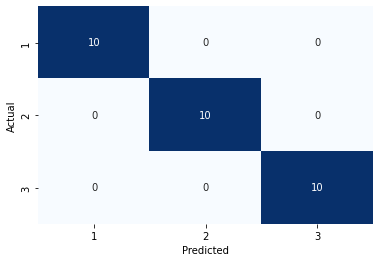

In [49]:
data = {'y_Actual':    y_actual,
        'y_Predicted': y_pred}

df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix, annot=True, cbar=False, cmap='Blues')
plt.show()

In [50]:
print('Acuracy = {}'.format(metrics.accuracy_score(y_actual, y_pred)))
print('F1 Score = {}'.format(f1_score(y_actual, y_pred, average='weighted')))

Acuracy = 1.0
F1 Score = 1.0


In [51]:
# Sample node
sample_node = 1
# Model node
model_node = 1

# Get sample data
node_df_left, node_df_right, selected_columns, left_columns, right_columns = focus_selector_complete(df_qpsk, node_to_be_eval=sample_node, min_desired_reduction_of_noise=0.15, aggregation = False, min_prime = False)

# Get model data
model_node_row_left, model_node_row_right = model_focus_selector(QPSK_dummy_df, left_columns, right_columns, node_to_be_eval=model_node)

print('---Left Side Shape---')
print(node_df_left.shape)
print(model_node_row_left.shape)

print('---right Side Shape---')
print(node_df_right.shape)
print(model_node_row_right.shape)

# Get linear regresion features
combined_features_dict, r_sqr_val, intercept_val, slope_val = linear_regresion(node_df_left, node_df_right, model_node_row_left, model_node_row_right)

print('---Linear Regresion Features---')
print('coefficient of determination:', r_sqr_val)
print('intercept:', intercept_val)
print('slope:', slope_val)

Reduced 1281 columns to 1045 columns.
18.0% reduced noise using a threshold of 1300%.
Columns selected [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 45, 46, 48, 49, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 98, 99, 100, 101, 102, 103, 104, 105, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 124, 125, 126, 127, 128, 130, 131, 132, 133, 138, 139, 140, 141, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 199, 202, 206, 207, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 239, 